In [202]:
#Distances that are useful for clustering alogrithms and beyond

How good is the clustering that we just performed? There is an index called Cross Cophenetic Correlation Coefficient (CP) that shows the goodness of fit of our similar to the Correlation Coefficient regression. 

In [1]:
from matplotlib import pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage, cophenet
from scipy.spatial.distance import pdist

import numpy as np
import pandas as pd
import os
from scipy.cluster.hierarchy import fcluster, cophenet

%matplotlib inline

In [2]:
# load the data
file_link = 'https://raw.githubusercontent.com/generalassembly-studio/DSI-course-materials/master/curriculum/04-lessons/week-07/3.2-lesson/assets/datasets/lang.csv?token=AGijO7zv8EQCEhdrPQLMgcLNUvLn4ugZks5XmG79wA%3D%3D'
lang = pd.read_csv(file_link)
print lang.shape
lang.head()

(16, 13)


,country,finnish,swedish,danish,norwegian,english,german,dutch,flemish,french,italian,spanish,portuguese
0,1,0,0,0,0,21,100,2,1,10,2,1,0
1,2,0,0,0,0,5,3,0,0,11,100,1,0
2,3,0,2,3,0,10,7,1,1,100,12,7,1
3,4,0,0,0,0,41,47,100,100,16,2,2,0
4,5,0,0,0,0,14,15,0,59,44,2,1,0


In [62]:
# Now, let's convert our data to a matrix to pass to the clustering algorithm - the matrix makes it easier for our algorithm to compute distance:
X = lang[1:].as_matrix(columns=None)
print X.shape
print X

(15, 13)
[[  2   0   0   0   0   5   3   0   0  11 100   1   0]
 [  3   0   2   3   0  10   7   1   1 100  12   7   1]
 [  4   0   0   0   0  41  47 100 100  16   2   2   0]
 [  5   0   0   0   0  14  15   0  59  44   2   1   0]
 [  6   0   0   0   0  31 100   4   1  92  10   0   0]
 [  7   0   0   0   0 100   7   0   0  15   3   2   0]
 [  8   0   0   0   0   9   0   0   0  10   1   2 100]
 [  9   0   0   0   0  18 100   1   1   4   2   1   0]
 [ 10   0   0   0   0  21  83   1   2  64  23   3   1]
 [ 11   5 100  10  11  43  25   0   0   6   1   1   0]
 [ 12   0  22 100  20  38  36   1   1  10   3   1   0]
 [ 13   0  25  19 100  34  19   0   0   4   1   0   1]
 [ 14 100  23   0   0  12  11   0   0   2   1   0   0]
 [ 15   0   0   0   0   5   1   0   0  11   2 100   0]
 [ 16   0   0   0   0 100   1   0   0   2   0   0   0]]


In [116]:
Z = linkage(X, method='single', metric='euclidean') 

Printing out Z, which shows step by step the implementation of agglormative clustering, with choosen distance and method. We can observe the increase of distances.

In [117]:
Z

array([[   5.        ,   14.        ,   17.29161647,    2.        ],
       [   4.        ,    8.        ,   37.12142239,    2.        ],
       [   7.        ,   16.        ,   65.9241989 ,    3.        ],
       [   1.        ,    3.        ,   82.06704576,    2.        ],
       [  17.        ,   18.        ,   85.98255637,    5.        ],
       [  15.        ,   19.        ,  108.57255639,    7.        ],
       [  10.        ,   11.        ,  115.41230437,    2.        ],
       [   9.        ,   21.        ,  117.38398528,    3.        ],
       [  20.        ,   22.        ,  117.98728745,   10.        ],
       [   2.        ,   23.        ,  119.24764149,   11.        ],
       [   0.        ,   24.        ,  120.0333287 ,   12.        ],
       [  13.        ,   25.        ,  121.44134387,   13.        ],
       [   6.        ,   26.        ,  122.05736356,   14.        ],
       [  12.        ,   27.        ,  126.00396819,   15.        ]])

In [118]:
Z[1] # print the ith iteration of points being merged 
     # [idx1, idx2, dist, sample_count]
     # Below: in the 2nd iteration, points 4 & 8 were merged,
        #which had a distance of 37.12142239 and formed a cluster with 
        #total of 2 points

array([  4.        ,   8.        ,  37.12142239,   2.        ])

Cophrenetic correlation coefficient compares (correlates) the actual pairwise distances of all data samples to those implied by the hierarchical clustering. The closer the value is to 1, the better the clustering preserves the original distances.

The linkage() function will use that method and metric to calculate the distances of the clusters (starting with your n individual samples (aka data points) as singleton clusters)) and in each iteration will merge the two clusters which have the smallest distance according the selected method and metric.

In [119]:
c, coph_dists = cophenet(Z, pdist(X))

In [138]:
c #Cophenetic Correlation Coefficient is simply correlation betwee
  #distance matrix and cophentic matrix Corr(cophrenetic_dist, correlation_dist)

0.78821339657848055

Condensed cophenetic distnce matrix in condense form. The ij entry is the cophentic distance btw original i and j observations

In [139]:
coph_dists

array([ 120.0333287 ,  120.0333287 ,  120.0333287 ,  120.0333287 ,
        120.0333287 ,  122.05736356,  120.0333287 ,  120.0333287 ,
        120.0333287 ,  120.0333287 ,  120.0333287 ,  126.00396819,
        121.44134387,  120.0333287 ,  119.24764149,   82.06704576,
         85.98255637,  108.57255639,  122.05736356,   85.98255637,
         85.98255637,  117.98728745,  117.98728745,  117.98728745,
        126.00396819,  121.44134387,  108.57255639,  119.24764149,
        119.24764149,  119.24764149,  122.05736356,  119.24764149,
        119.24764149,  119.24764149,  119.24764149,  119.24764149,
        126.00396819,  121.44134387,  119.24764149,   85.98255637,
        108.57255639,  122.05736356,   85.98255637,   85.98255637,
        117.98728745,  117.98728745,  117.98728745,  126.00396819,
        121.44134387,  108.57255639,  108.57255639,  122.05736356,
         65.9241989 ,   37.12142239,  117.98728745,  117.98728745,
        117.98728745,  126.00396819,  121.44134387,  108.57255

Let's look at dendrogram again and add some notations

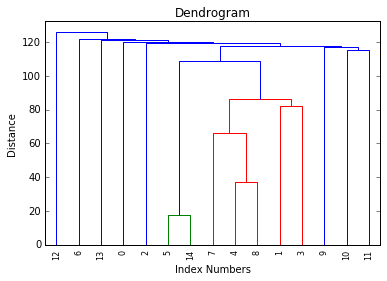

In [140]:
# now let's make our dendrogram
plt.title('Dendrogram')
plt.xlabel('Index Numbers')
plt.ylabel('Distance')
dendrogram(
    Z,
    leaf_rotation=90.,  
    leaf_font_size=8.,
)
plt.show()

Starting from each label at the bottom, you can see a vertical line up to a horizontal line. The height of that horizontal line tells you about the distance at which this label was merged into another label or cluster. You can find that other cluster by following the other vertical line down again. If you don't encounter another horizontal line, it was just merged with the other label you reach, otherwise it was merged into another cluster that was formed earlier.

Summarizing:

- horizontal lines are cluster merges
- vertical lines tell you which clusters/labels were part of merge forming that new cluster
- heights of the horizontal lines tell you about the distance that needed to be "bridged" to form the new cluster
- You can also see that from distances > 170 up there's a huge jump of the distance to the final merge at a distance of approx. 210. 
    - large jumps in distances can indicate merges that shouldn't be merged

Let's have a look at the distances of the last 4 merges:

In [141]:
Z[-4:]

array([[   0.        ,   24.        ,  120.0333287 ,   12.        ],
       [  13.        ,   25.        ,  121.44134387,   13.        ],
       [   6.        ,   26.        ,  122.05736356,   14.        ],
       [  12.        ,   27.        ,  126.00396819,   15.        ]])

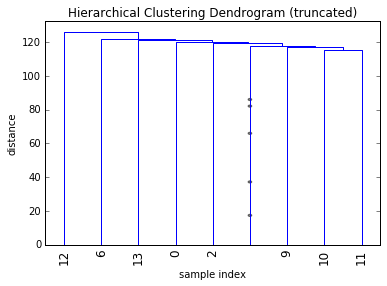

In [142]:
#Trunc the dendrogram - shows the last 9 merges in the graph

plt.title('Hierarchical Clustering Dendrogram (truncated)')
plt.xlabel('sample index')
plt.ylabel('distance')
dendrogram(
    Z,
    truncate_mode='lastp',  # show only the last p merged clusters
    p=9,  # show only the last p merged clusters
    show_leaf_counts=False,  # otherwise numbers in brackets are counts
    leaf_rotation=90.,
    leaf_font_size=12.,
    show_contracted=True,  # to get a distribution impression in truncated branches
)
plt.show()

Let's add distance annotations to each merge point

In [143]:
def fancy_dendrogram(*args, **kwargs):
    max_d = kwargs.pop('max_d', None)
    if max_d and 'color_threshold' not in kwargs:
        kwargs['color_threshold'] = max_d
    annotate_above = kwargs.pop('annotate_above', 0)

    ddata = dendrogram(*args, **kwargs)

    if not kwargs.get('no_plot', False):
        plt.title('Hierarchical Clustering Dendrogram (truncated)')
        plt.xlabel('sample index or (cluster size)')
        plt.ylabel('distance')
        for i, d, c in zip(ddata['icoord'], ddata['dcoord'], ddata['color_list']):
            x = 0.5 * sum(i[1:3])
            y = d[1]
            if y > annotate_above:
                plt.plot(x, y, 'o', c=c)
                plt.annotate("%.3g" % y, (x, y), xytext=(0, -5),
                             textcoords='offset points',
                             va='top', ha='center')
        if max_d:
            plt.axhline(y=max_d, c='k')
    return ddata

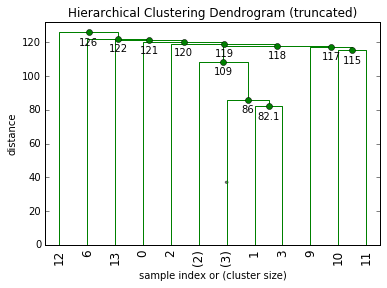

In [144]:
fancy_dendrogram(
    Z,
    truncate_mode='lastp',
    p=12,
    leaf_rotation=90.,
    leaf_font_size=12.,
    show_contracted=True,
    annotate_above=10,  # useful in small plots so annotations don't overlap
    max_d=150  # plot a horizontal cut-off line
)
plt.show()

The idea behind calculation of cophrenetic coefficient! 

In [162]:
from scipy.spatial import distance
import numpy as np
import math 
from scipy.stats.stats import pearsonr   


sq_form_dist = distance.squareform(pdist(X))
sq_form_coph = distance.squareform(coph_dists)

#Create a matrix of distances
new = np.empty([X.shape[0], X.shape[1]])
for i in range(0, X.shape[0]):
    for j in range(0, X.shape[1]):
        new[i,j] = math.hypot(i-j, j-i)
        

In [163]:
corr_dist_coph = np.empty([X.shape[0], 2])

#loops through matrix to line up 
for i in range(0, X.shape[0]):
    for j in range(0, X.shape[1]):
        if j < i:
            corr_dist_coph[i, 0] = sq_form_dist[i,j]
            corr_dist_coph[i, 1] = sq_form_coph[i,j]

In [164]:
np.corrcoef(corr_dist_coph[:, 0], corr_dist_coph[:, 1])

array([[ 1.        ,  0.93633395],
       [ 0.93633395,  1.        ]])

In [165]:
corr_dist_coph

array([[   0.        ,    0.        ],
       [ 125.53485572,  120.0333287 ],
       [ 171.34468186,  119.24764149],
       [ 119.24764149,  119.24764149],
       [ 115.16944039,   85.98255637],
       [ 139.31977605,  108.57255639],
       [ 135.49907749,  122.05736356],
       [ 141.85203559,  122.05736356],
       [  65.9241989 ,   65.9241989 ],
       [ 133.9888055 ,  117.98728745],
       [ 120.24558204,  117.38398528],
       [ 115.41230437,  115.41230437],
       [ 144.63402089,  126.00396819],
       [ 144.08677941,  126.00396819],
       [ 135.56548233,  126.00396819]])

In [157]:
pearsonr(corr_dist_coph[:, 0], corr_dist_coph[:, 1])

(0.86332270501383646, 3.3876906205342224e-05)

# Jaccard Distance

Don't look at the functions below. Write your own function to create a jaccard distance measure

|A $\cup$ B| / | A $\cap$ B| 
Intersection divided by union

But here is an example of calculating jaccard with sklearn function 

In [200]:
import numpy as np
from sklearn.metrics import jaccard_similarity_score
y_pred = [0, 2, 1, 3]
y_true = [0, 1, 2, 3]
print jaccard_similarity_score(y_true, y_pred)
print jaccard_similarity_score(y_true, y_pred, normalize=False)

0.5
2


In [201]:
def DistJaccard(a,  b):
    str1 = set(a.split(' '))
    str2 = set(b.split(' '))
        
    return float(len(str1 & str2)) / len(str1 | str2)

DistJaccard("Hello my name is Slim Shady", "Hello Good afternoon")

0.125

In [197]:
def jaccard_set(a_str,b_str):
    a=a_str.split()
    b=b_str.split()
    union = list(set(a+b))
    intersection = list(set(a) - (set(a)-set(b)))
    print "Union - %s" % union
    print "Intersection - %s" % intersection
    jaccard_coeff = float(len(intersection))/len(union)
    print "Jaccard Coefficient is = %f " % jaccard_coeff

In [198]:
jaccard_set("Hello my name is", "Hello Good afternoon")

Union - ['Good', 'name', 'is', 'afternoon', 'my', 'Hello']
Intersection - ['Hello']
Jaccard Coefficient is = 0.166667 
